I ran the following notebook in a docker container with the following commands:

```
docker run -it -p 8888:8888 -p 6006:6006 -v `pwd`:/space/ -w /space/ --rm --name md waleedka/modern-deep-learning jupyter notebook --ip=0.0.0.0 --allow-root
```

The following code is adapted from http://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
%%bash
pip install seaborn
pip install tables

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegressionCV

In [3]:
import pandas as pd

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20160101', periods=6)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2016-01-01,-0.826939,-0.163803,-0.074514,0.326973
2016-01-02,0.300128,-1.156534,0.310648,-1.033273
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733
2016-01-04,-0.475801,-1.205935,2.323941,2.613977
2016-01-05,-0.314875,0.047854,0.613834,-0.784943
2016-01-06,0.420169,-0.053880,0.649436,0.444564


In [7]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["a","b","c", "d"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,a,foo
1,1.0,2013-01-02,1.0,3,b,foo
2,1.0,2013-01-02,1.0,3,c,foo
3,1.0,2013-01-02,1.0,3,d,foo


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [9]:
df.index, df.columns, df.values

(DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
                '2016-01-05', '2016-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D'], dtype='object'),
 array([[-0.82693928, -0.16380256, -0.07451438,  0.32697251],
        [ 0.30012842, -1.15653365,  0.31064788, -1.03327272],
        [-0.59957585, -0.02154901, -0.53482524, -3.23773323],
        [-0.4758007 , -1.2059352 ,  2.32394139,  2.61397674],
        [-0.31487454,  0.04785405,  0.61383393, -0.78494332],
        [ 0.42016856, -0.05388024,  0.64943567,  0.44456383]]))

In [10]:
df2.index, df2.columns, df2.values

(Int64Index([0, 1, 2, 3], dtype='int64'),
 Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object'),
 array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'a', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'b', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'c', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'd', 'foo']], dtype=object))

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.249482,-0.425641,0.548087,-0.278406
std,0.502399,0.589460,0.978260,1.941086
min,-0.826939,-1.205935,-0.534825,-3.237733
25%,-0.568632,-0.908351,0.021776,-0.971190
50%,-0.395338,-0.108841,0.462241,-0.228985
75%,0.146378,-0.029632,0.640535,0.415166
max,0.420169,0.047854,2.323941,2.613977


In [12]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [13]:
df.T

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00
A,-0.826939,0.300128,-0.599576,-0.475801,-0.314875,0.420169
B,-0.163803,-1.156534,-0.021549,-1.205935,0.047854,-0.053880
C,-0.074514,0.310648,-0.534825,2.323941,0.613834,0.649436
D,0.326973,-1.033273,-3.237733,2.613977,-0.784943,0.444564


In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2016-01-01,0.326973,-0.074514,-0.163803,-0.826939
2016-01-02,-1.033273,0.310648,-1.156534,0.300128
2016-01-03,-3.237733,-0.534825,-0.021549,-0.599576
2016-01-04,2.613977,2.323941,-1.205935,-0.475801
2016-01-05,-0.784943,0.613834,0.047854,-0.314875
2016-01-06,0.444564,0.649436,-0.053880,0.420169


In [15]:
df.sort_values(by='B')

,A,B,C,D
2016-01-04,-0.475801,-1.205935,2.323941,2.613977
2016-01-02,0.300128,-1.156534,0.310648,-1.033273
2016-01-01,-0.826939,-0.163803,-0.074514,0.326973
2016-01-06,0.420169,-0.053880,0.649436,0.444564
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733
2016-01-05,-0.314875,0.047854,0.613834,-0.784943


In [16]:
df['A']

2016-01-01   -0.826939
2016-01-02    0.300128
2016-01-03   -0.599576
2016-01-04   -0.475801
2016-01-05   -0.314875
2016-01-06    0.420169
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]

,A,B,C,D
2016-01-01,-0.826939,-0.163803,-0.074514,0.326973
2016-01-02,0.300128,-1.156534,0.310648,-1.033273
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733


In [18]:
df['20160102':'20160104']

,A,B,C,D
2016-01-02,0.300128,-1.156534,0.310648,-1.033273
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733
2016-01-04,-0.475801,-1.205935,2.323941,2.613977


In [19]:
df.loc[dates[2]]

A   -0.599576
B   -0.021549
C   -0.534825
D   -3.237733
Name: 2016-01-03 00:00:00, dtype: float64

In [20]:
df.loc[:,['A','D']]

,A,D
2016-01-01,-0.826939,0.326973
2016-01-02,0.300128,-1.033273
2016-01-03,-0.599576,-3.237733
2016-01-04,-0.475801,2.613977
2016-01-05,-0.314875,-0.784943
2016-01-06,0.420169,0.444564


In [21]:
df.iloc[3:5,0:2]

,A,B
2016-01-04,-0.475801,-1.205935
2016-01-05,-0.314875,0.047854


In [22]:
df[df.A > 0.5]

,A,B,C,D


In [23]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2016-01-01,-0.826939,-0.163803,-0.074514,0.326973,one
2016-01-02,0.300128,-1.156534,0.310648,-1.033273,one
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733,two
2016-01-04,-0.475801,-1.205935,2.323941,2.613977,three
2016-01-05,-0.314875,0.047854,0.613834,-0.784943,four
2016-01-06,0.420169,-0.053880,0.649436,0.444564,three


In [24]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733,two
2016-01-05,-0.314875,0.047854,0.613834,-0.784943,four


In [25]:
df['F'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20160101', periods=6))
df

,A,B,C,D,F
2016-01-01,-0.826939,-0.163803,-0.074514,0.326973,1
2016-01-02,0.300128,-1.156534,0.310648,-1.033273,2
2016-01-03,-0.599576,-0.021549,-0.534825,-3.237733,3
2016-01-04,-0.475801,-1.205935,2.323941,2.613977,4
2016-01-05,-0.314875,0.047854,0.613834,-0.784943,5
2016-01-06,0.420169,-0.053880,0.649436,0.444564,6


In [26]:
df.at[dates[0],'A'] = 0.456
df.at[dates[0],'A']

0.45600000000000002

In [27]:
df.iat[0,1] = 0.123
df.iat[0,1]

0.123

In [28]:
df.loc[:,'D'] = np.array([5] * len(df))
df.loc[:,'D']

2016-01-01    5
2016-01-02    5
2016-01-03    5
2016-01-04    5
2016-01-05    5
2016-01-06    5
Freq: D, Name: D, dtype: int64

In [29]:
df.loc[:,'B':'D'] = np.random.randn(len(df), 3)
df.loc[:,'B':'D']

,B,C,D
2016-01-01,-0.255574,0.461626,1.589978
2016-01-02,-0.211297,-0.915713,0.669892
2016-01-03,-0.338290,0.222988,-0.270507
2016-01-04,0.114369,0.499945,-0.545886
2016-01-05,0.085580,-1.282786,1.911286
2016-01-06,0.568756,0.975439,0.181616


In [30]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[:, 'E'] = np.random.randn(len(df1))
df1

,A,B,C,D,F,E
2016-01-01,0.456000,-0.255574,0.461626,1.589978,1,1.430759
2016-01-02,0.300128,-0.211297,-0.915713,0.669892,2,-0.426582
2016-01-03,-0.599576,-0.338290,0.222988,-0.270507,3,-0.418479
2016-01-04,-0.475801,0.114369,0.499945,-0.545886,4,0.419359


In [31]:
df1.iloc[1,5] = np.nan
df1.dropna(how='any')

,A,B,C,D,F,E
2016-01-01,0.456000,-0.255574,0.461626,1.589978,1,1.430759
2016-01-03,-0.599576,-0.338290,0.222988,-0.270507,3,-0.418479
2016-01-04,-0.475801,0.114369,0.499945,-0.545886,4,0.419359


In [32]:
df1.iloc[1,5] = np.nan
df1.fillna(value=5)

,A,B,C,D,F,E
2016-01-01,0.456000,-0.255574,0.461626,1.589978,1,1.430759
2016-01-02,0.300128,-0.211297,-0.915713,0.669892,2,5.000000
2016-01-03,-0.599576,-0.338290,0.222988,-0.270507,3,-0.418479
2016-01-04,-0.475801,0.114369,0.499945,-0.545886,4,0.419359


In [33]:
pd.isnull(df1)

,A,B,C,D,F,E
2016-01-01,False,False,False,False,False,False
2016-01-02,False,False,False,False,False,True
2016-01-03,False,False,False,False,False,False
2016-01-04,False,False,False,False,False,False


In [34]:
df.median()

A   -0.007373
B   -0.062859
C    0.342307
D    0.425754
F    3.500000
dtype: float64

In [35]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2016-01-01    NaN
2016-01-02    NaN
2016-01-03    1.0
2016-01-04    3.0
2016-01-05    5.0
2016-01-06    NaN
Freq: D, dtype: float64

In [36]:
df.sub(s, axis='index')

,A,B,C,D,F
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN
2016-01-03,-1.599576,-1.338290,-0.777012,-1.270507,2.0
2016-01-04,-3.475801,-2.885631,-2.500055,-3.545886,1.0
2016-01-05,-5.314875,-4.914420,-6.282786,-3.088714,0.0
2016-01-06,NaN,NaN,NaN,NaN,NaN


In [37]:
df.apply(np.cumsum)

,A,B,C,D,F
2016-01-01,0.456000,-0.255574,0.461626,1.589978,1
2016-01-02,0.756128,-0.466871,-0.454087,2.259870,3
2016-01-03,0.156553,-0.805161,-0.231099,1.989363,6
2016-01-04,-0.319248,-0.690793,0.268845,1.443477,10
2016-01-05,-0.634123,-0.605212,-1.013940,3.354763,15
2016-01-06,-0.213954,-0.036456,-0.038501,3.536379,21


In [38]:
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a,axis=0)      # sum over rows for each of the 3 columns

array([[1, 2, 3],
       [5, 7, 9]])

In [39]:
np.cumsum(a,axis=1)      # sum over columns for each of the 2 rows

array([[ 1,  3,  6],
       [ 4,  9, 15]])

In [40]:
df.apply(lambda x: (x.max(),  x.min()))

A             (0.456, -0.599575852939)
B    (0.568755883988, -0.338290005074)
C     (0.975439056039, -1.28278567073)
D     (1.91128583525, -0.545886260128)
F                           (6.0, 1.0)
dtype: object

In [41]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

1    5
6    1
5    1
4    1
3    1
0    1
dtype: int64

In [42]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [43]:
s.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [44]:
s.str.cat()

'ABCAabaBacaCABAdogcat'

In [45]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,-1.059028,-1.120268,1.624377,0.370611
1,-1.504340,-2.523309,0.615287,-0.762970
2,1.515284,-0.683369,2.530299,-0.015027


In [46]:
pd.concat(pieces)

,0,1,2,3
0,-1.059028,-1.120268,1.624377,0.370611
1,-1.504340,-2.523309,0.615287,-0.762970
2,1.515284,-0.683369,2.530299,-0.015027
3,0.033077,0.046818,1.565155,-0.528985
4,1.677357,-0.607068,0.923661,-0.652335
5,1.126987,0.475494,0.318234,-0.679591
6,-0.378396,0.302890,0.522557,0.236514
7,0.356856,0.484882,-1.873572,-1.366465
8,-0.425059,-1.438038,1.680969,0.166428
9,-0.289812,0.447258,1.318828,-1.344262


In [47]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [48]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [49]:
left = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
joined = pd.merge(left, right, on='key')
joined

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,3,4
3,foo,3,6
4,bar,2,5


In [50]:
joined[joined.key == 'foo'].lval.sum()

8

In [51]:
joined.groupby(by='key').sum()

,lval,rval
key,,
bar,2,5
foo,8,20


In [52]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.693852,0.380116,-0.537467,0.718994
1,-1.519064,-1.670189,1.500503,-0.874475
2,-0.474730,-0.195771,0.906235,1.344520
3,0.204044,0.285800,-0.033744,-0.796363
4,0.566253,2.880699,0.425773,-1.248533
5,-1.277346,-0.703705,-0.666372,-0.026142
6,-0.025699,0.070667,-0.125603,1.240501
7,0.073028,1.115051,-0.197851,0.295895
8,0.204044,0.285800,-0.033744,-0.796363


In [53]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

In [54]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.959818  0.482899
    three  0.528382  0.780784
    two   -0.604226 -0.148678
foo one   -0.291821  3.435465
    three -1.599292 -0.207794
    two    1.904411 -0.599106

In [55]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                       'foo', 'foo', 'qux', 'qux'],
                      ['one', 'two'] * 4]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [56]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [57]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.418252  0.344219
      two     2.158640  1.098525
baz   one     1.548549 -0.859605
      two     0.605646 -0.437083
foo   one    -1.096479 -0.670109
      two    -1.304646 -0.638496
qux   one     1.393073  0.169382
      two    -0.706941 -1.544308

In [58]:
df.loc['foo', 'one']

A   -1.096479
B   -0.670109
Name: (foo, one), dtype: float64

In [59]:
df.loc['foo', :].A

second
one   -1.096479
two   -1.304646
Name: A, dtype: float64

In [60]:
df2 = df[:4]
stacked = df2.stack()

In [61]:
stacked.unstack()

A         B
first second                    
bar   one     1.418252  0.344219
      two     2.158640  1.098525
baz   one     1.548549 -0.859605
      two     0.605646 -0.437083

In [62]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.418252  1.548549
       B  0.344219 -0.859605
two    A  2.158640  0.605646
       B  1.098525 -0.437083

In [63]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.418252  2.158640
      B  0.344219  1.098525
baz   A  1.548549  0.605646
      B -0.859605 -0.437083

In [64]:
stacked.unstack(2)

A         B
first second                    
bar   one     1.418252  0.344219
      two     2.158640  1.098525
baz   one     1.548549 -0.859605
      two     0.605646 -0.437083

In [65]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                  'B' : ['A', 'B', 'C'] * 4,
                  'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.909743,-1.031671
1,one,B,foo,-0.831524,0.313129
2,two,C,foo,-2.479031,-0.349880
3,three,A,bar,1.870952,-0.399249
4,one,B,bar,0.667440,-0.830666
5,one,C,bar,-0.574107,0.083309
6,two,A,foo,1.492254,-0.455791
7,three,B,foo,0.521125,-0.363571
8,one,C,foo,-0.995509,2.005160
9,one,A,bar,-0.103448,0.538178


In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.103448  1.909743
      B  0.667440 -0.831524
      C -0.574107 -0.995509
three A  1.870952       NaN
      B       NaN  0.521125
      C  0.359507       NaN
two   A       NaN  1.492254
      B  0.728369       NaN
      C       NaN -2.479031

In [67]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
                         'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
                         'Sales' : [13,6,16,8,4,3,1]})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [68]:
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True)
table

Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0

In [69]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [70]:
rng = pd.date_range('1/1/2016', periods=100, freq='S')
rng[50]

Timestamp('2016-01-01 00:00:50', freq='S')

In [71]:
len(rng)

100

In [72]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

2016-01-01 00:00:00    493
2016-01-01 00:00:01     49
2016-01-01 00:00:02    360
2016-01-01 00:00:03    208
2016-01-01 00:00:04    395
Freq: S, dtype: int64

In [73]:
ts5 = ts.resample('5Min')

In [74]:
ts5.count()

2016-01-01    100
Freq: 5T, dtype: int64

In [75]:
ts5.median()

2016-01-01    235.5
Freq: 5T, dtype: float64

In [76]:
ts.asfreq('10T')

2016-01-01    493
Freq: 10T, dtype: int64

In [77]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [78]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [79]:
df["grade"].cat.categories = ["good", "normal", "bad"]
df

,id,raw_grade,grade
0,1,a,good
1,2,b,normal
2,3,b,normal
3,4,a,good
4,5,a,good
5,6,e,bad


In [80]:
df.groupby("grade").size()

grade
good      3
normal    2
bad       1
dtype: int64

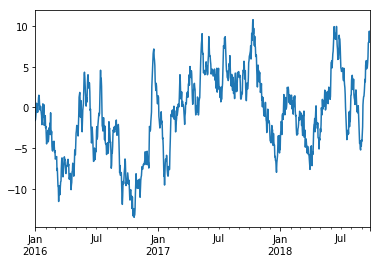

In [81]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))
ts = ts.cumsum()
ts.plot()

In [82]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])

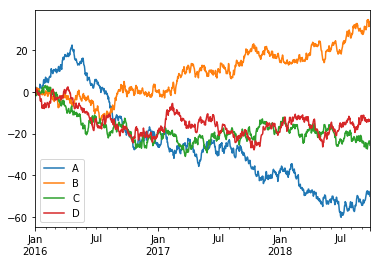

In [83]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [84]:
df.to_csv('/tmp/foo.csv')

In [85]:
pd.read_csv('/tmp/foo.csv')

,Unnamed: 0,A,B,C,D
0,2016-01-01,-1.472267,0.729663,-0.246746,-1.329225
1,2016-01-02,1.153705,0.174238,-0.362552,-1.136000
2,2016-01-03,2.259932,-0.265956,-1.281259,1.107218
3,2016-01-04,0.516835,0.351568,-1.791915,1.160235
4,2016-01-05,1.764396,0.847493,-0.755602,1.405774
5,2016-01-06,1.901552,1.985447,-0.485485,0.651438
6,2016-01-07,-0.713619,0.665964,-1.264428,0.131503
7,2016-01-08,-0.727720,0.299134,-1.225155,0.390531
8,2016-01-09,-0.806458,-0.709848,0.222467,-1.052555
9,2016-01-10,-0.758761,-0.779754,-1.303136,-1.391486


In [86]:
 df.to_hdf('/tmp/foo.h5','df')